# Graphs representing blacklisting in network given averaged variable lies

This notebook allows us to create graphs showing how many liars are blacklisted, given the average discreptancy between the true latencies and the lies influencing individual nodes.

The data for these graphs can be collected using the go test **TestVarLiesGraphCreation** and setting the config **linear** to **false**.

 The generated graphs can be found under python_graphs/var_lies/graphs/percentage.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#configs - these must match the configs in the graph_var_lies_test.go file to correctly retrieve the data
linear = False        #collect data as sum or as percentage
withSuspects = True  #use enhanced blacklisting algorithm
singleVictim = False #liars target single victim
coordinated = False  #liars coordinate (their lies do not contradict each other)
nbNodes = 100
nbLiars = 33
maxLatency = 850    #the maximum amount by which a lie deviates from the corresponding latency's true value

nbVictims = "all"
if singleVictim:
    nbVictims = "one"
    
coord = "coordinated"
if coordinated == False:
    coord = "uncoordinated"

filename = "test_" + str(nbNodes) + "_nodes_" + str(nbLiars) + "_liars"+"_attack_" + nbVictims + \
"_distance_" + str(maxLatency)+"_" + coord

if withSuspects:
    filename += "_with_suspects"

In [3]:
statuses = {0: "no endpoint blacklisted", 1: "one endpoint blacklisted", 2: "both endpoints blacklisted"}
colors = {"no endpoint blacklisted": "green", 
          "one endpoint blacklisted": "blue", 
          "both endpoints blacklisted": "red"}

In [4]:
pd.read_csv("data/percentage/"+filename+".csv")

,node_1,node_2,lie_percentage,nb_strikes_1,nb_strikes_2,threshold,blacklisted_1,blacklisted_2
0,N0,N1,0.16,1,1,19602,True,True
1,N0,N2,0.92,1,1,19602,True,True
2,N0,N3,0.77,1,1,19602,True,True
3,N0,N4,0.44,1,1,19602,True,True
4,N0,N5,1.22,1,1,19602,True,True
5,N0,N6,0.70,1,1,19602,True,True
6,N0,N7,0.57,1,1,19602,True,True
7,N0,N8,1.45,1,1,19602,True,True
8,N0,N9,0.33,1,1,19602,True,True
9,N0,N10,0.50,1,1,19602,True,True


In [5]:
data= pd.read_csv("data/percentage/"+filename+".csv")[[
    "node_1","node_2","lie_percentage","nb_strikes_1","nb_strikes_2","threshold","blacklisted_1","blacklisted_2"]]

threshold = data["threshold"][0]

In [6]:
data

,node_1,node_2,lie_percentage,nb_strikes_1,nb_strikes_2,threshold,blacklisted_1,blacklisted_2
0,N0,N1,0.16,1,1,19602,True,True
1,N0,N2,0.92,1,1,19602,True,True
2,N0,N3,0.77,1,1,19602,True,True
3,N0,N4,0.44,1,1,19602,True,True
4,N0,N5,1.22,1,1,19602,True,True
5,N0,N6,0.70,1,1,19602,True,True
6,N0,N7,0.57,1,1,19602,True,True
7,N0,N8,1.45,1,1,19602,True,True
8,N0,N9,0.33,1,1,19602,True,True
9,N0,N10,0.50,1,1,19602,True,True


In [7]:
grouped = pd.DataFrame(data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)).reset_index()

lies_N = pd.DataFrame(grouped[grouped["node_1"] == "N5"]["lie_percentage"]).reset_index()["lie_percentage"][0]

print(list(pd.DataFrame(lies_N).sort_values(by=0)[0]))

[0.01, 0.02, 0.03, 0.03, 0.03, 0.04, 0.05, 0.06, 0.06, 0.08, 0.09, 0.09, 0.1, 0.1, 0.11, 0.11, 0.12, 0.12, 0.13, 0.14, 0.15, 0.16, 0.16, 0.17, 0.18, 0.19, 0.19, 0.19, 0.21, 0.22, 0.24, 0.26, 0.27, 0.29, 0.29, 0.3, 0.32, 0.32, 0.33, 0.34, 0.36, 0.37, 0.37, 0.37, 0.39, 0.39, 0.42, 0.42, 0.43, 0.47, 0.47, 0.47, 0.52, 0.54, 0.54, 0.55, 0.55, 0.56, 0.58, 0.58, 0.59, 0.6, 0.61, 0.65, 0.66, 0.73, 0.74, 0.74, 0.75, 0.78, 0.79, 0.79, 0.8, 0.81, 0.82, 0.82, 0.85, 0.86, 0.86, 0.9, 0.9, 0.9, 0.9, 0.94, 0.96, 0.96, 0.97, 0.97, 0.99, 0.99, 1.02, 1.04, 1.06, 1.09, 1.14, 1.2, 1.22, 1.23, 1.4]


In [8]:
nb_strikes = data\
    .groupby(["nb_strikes_1", "node_1"])["lie_percentage"]\
    .apply(list)\
    .reset_index()["nb_strikes_1"]

is_blacklisted = nb_strikes = data\
    .groupby(["nb_strikes_1", "node_1"])["blacklisted_1"]\
    .apply(list)\
    .reset_index()["nb_strikes_1"]


Text(0.5, 1.0, "Given the average difference between a node's true latencies \n and the lies it tells/hears, is it blacklisted?")

<Figure size 432x288 with 0 Axes>

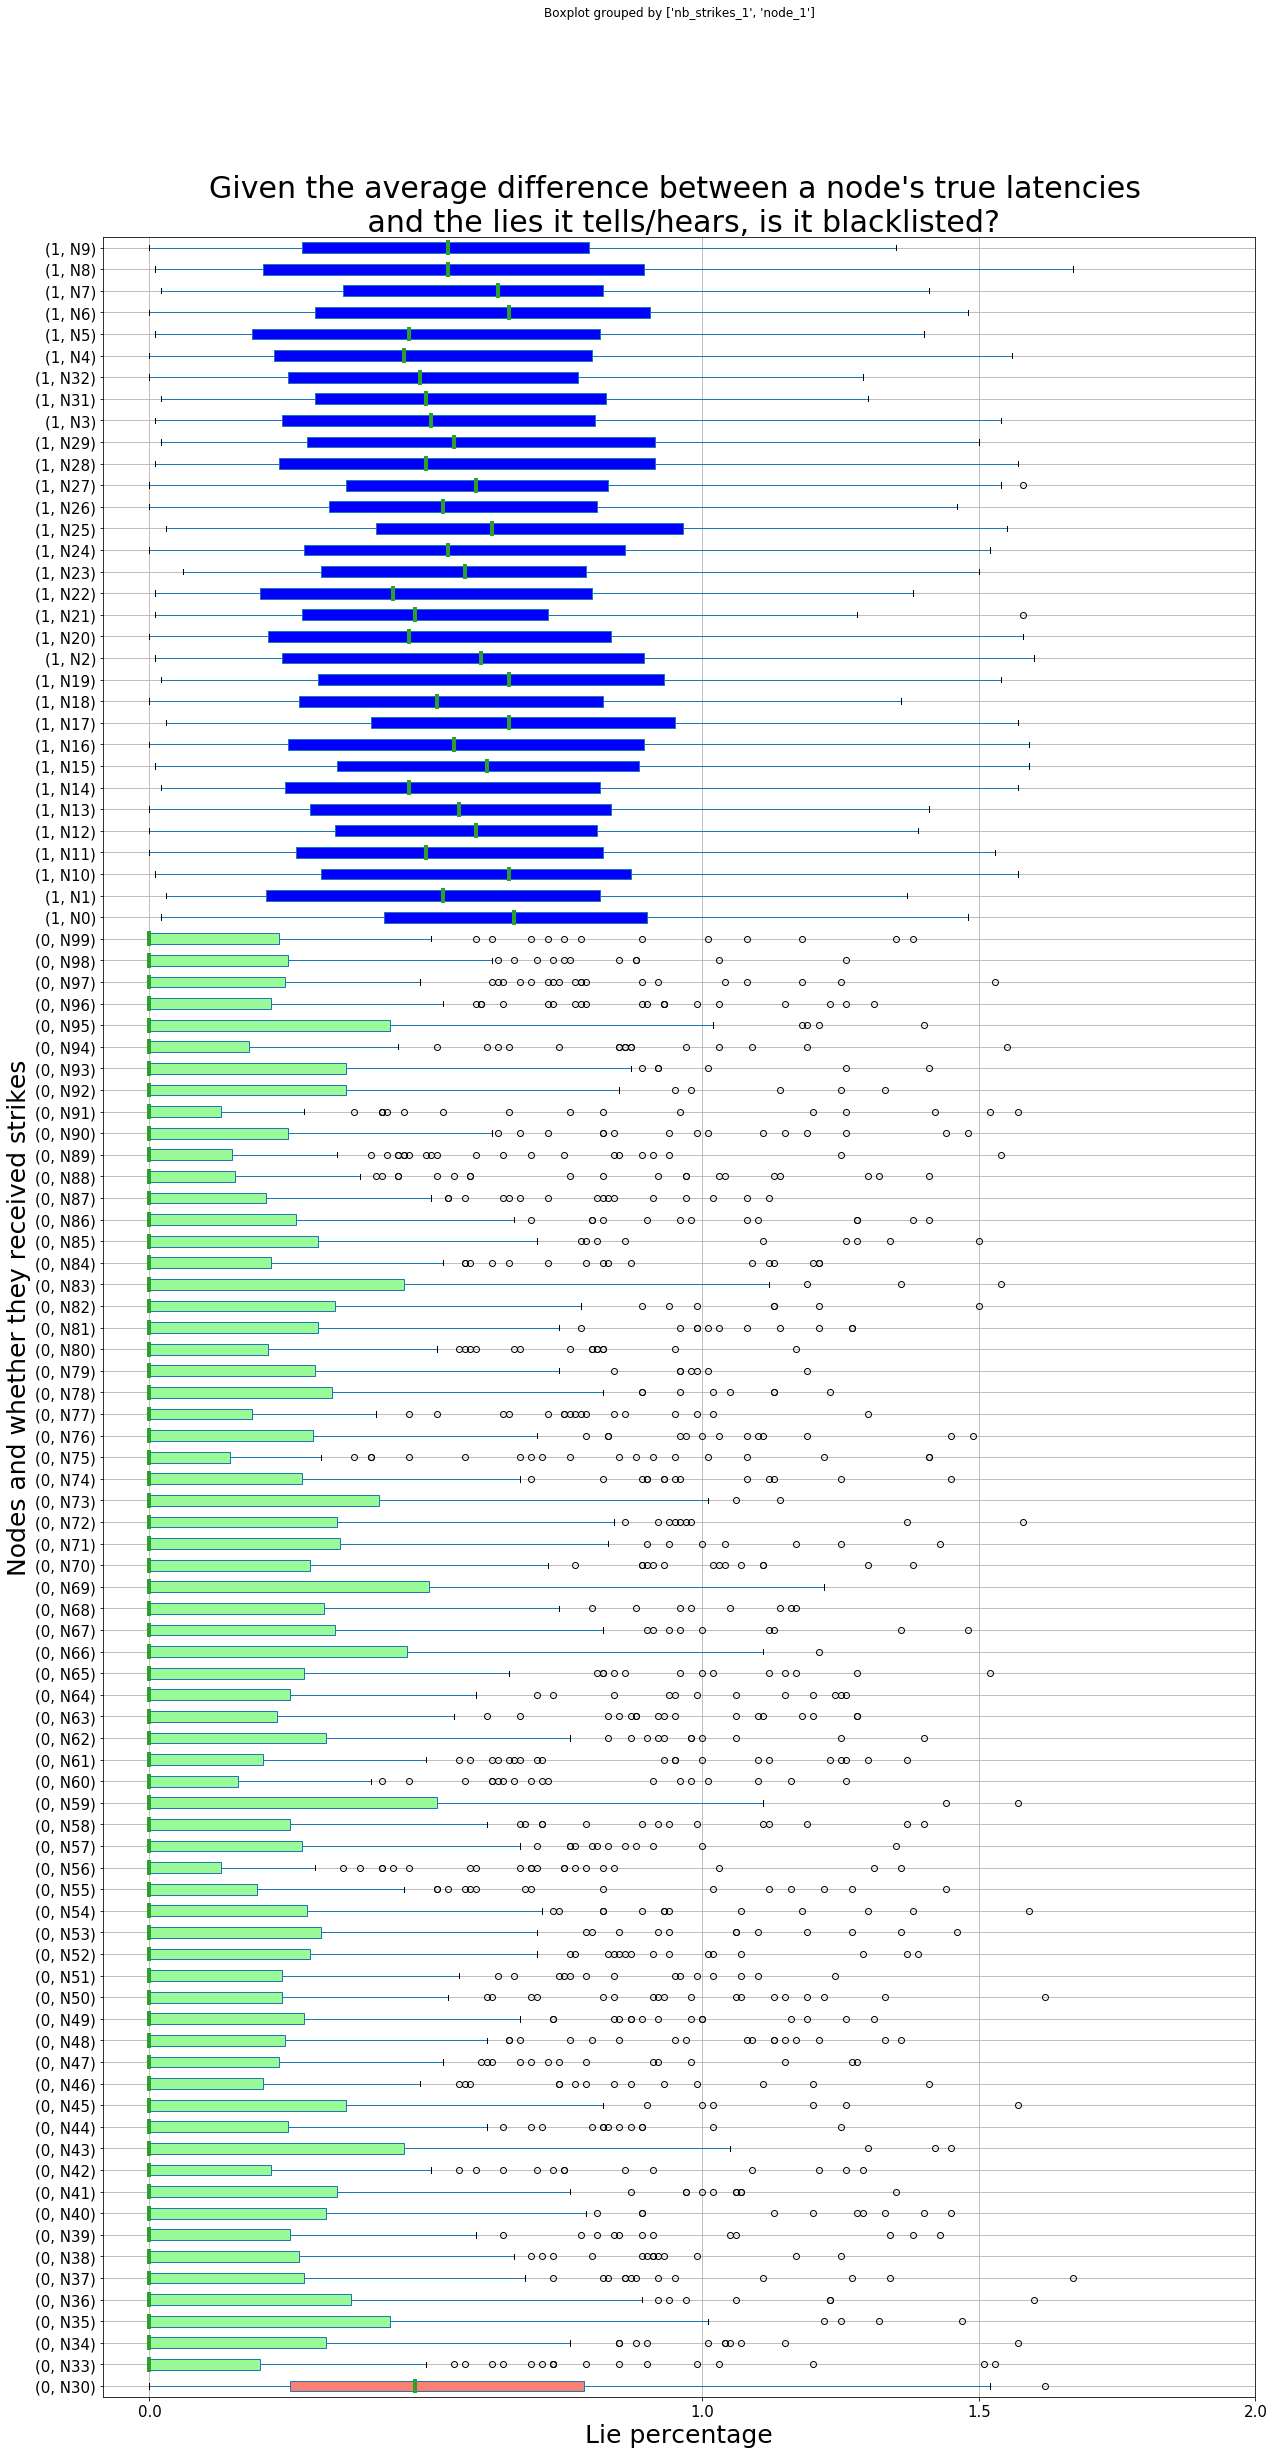

In [9]:
plt.figure()

#might need to be adjusted
percentages = [0, 1, 1.5, 2]

medianprops = dict(linestyle='-', linewidth=4, color='blue')

size = 40
if nbNodes == "200":
    size = 50

bp = pd.DataFrame.boxplot( data,
    column="lie_percentage",
    by=["nb_strikes_1", "node_1"], 
    figsize=(20, 40), 
    vert=False, 
    medianprops=medianprops,
    return_type='both', 
    patch_artist = True,
    fontsize=15)
    
colors = ['salmon', 'palegreen', 'blue']
for row_key, (ax,row) in bp.iteritems():
    ax.set_xticks(percentages)
    ax.set_xlabel('Lie percentage', fontsize=25)
    ax.set_ylabel('Nodes and whether they received strikes', fontsize=25)
    for i,box in enumerate(row['boxes']):
        color_id = 1
        if i == 0 or nb_strikes[i] >= threshold:
            color_id = 0
        elif is_blacklisted[i] == 1:
            color_id = 2
            
        box.set_facecolor(colors[color_id])
plt.title("Given the average difference between a node's true latencies \n and the lies it tells/hears,"+\
          " is it blacklisted?", fontsize=30)
        

#ax.set_yticks(np.arange(0, 100, step=500))

In [10]:
fig = ax.get_figure()
fig.savefig("graphs/percentage/"+filename +".png")